In [61]:
#require "jupyter.notebook"


module Jup = struct 
include Jupyter_notebook
let showhtml = display "text/html"
let showsvg = display "image/svg+xml"
end 

module HtmlUtil = struct
end

let show = Jup.showhtml

module Jup :
  sig
    type ctx = Jupyter_notebook.ctx
    type display_id = Jupyter_notebook.display_id
    val cell_context : unit -> ctx
    val display :
      ?ctx:ctx ->
      ?display_id:display_id ->
      ?metadata:Yojson.Safe.json ->
      ?base64:bool -> string -> string -> display_id
    val display_file :
      ?ctx:ctx ->
      ?display_id:display_id ->
      ?metadata:Yojson.Safe.json ->
      ?base64:bool -> string -> string -> display_id
    val clear_output : ?ctx:ctx -> ?wait:bool -> unit -> unit
    val formatter : Format.formatter
    val printf : ('a, Format.formatter, unit) format -> 'a
    val display_formatter :
      ?ctx:ctx ->
      ?display_id:display_id ->
      ?metadata:Yojson.Safe.json -> ?base64:bool -> string -> display_id
    val showhtml : string -> display_id
    val showsvg : string -> display_id
  end


module HtmlUtil : sig  end


val show : string -> Jup.display_id = <fun>


In [4]:
type icname = 
    | Process of string
    | File of string
let openic = function 
    | Process cmd -> Unix.open_process_in cmd
    | File filename -> open_in filename
let readallic ic = 
  let buf = ref "" in 
  (try
    while true do
      let line = input_line ic in
      buf := !buf ^ line ^ "\n"
    done
  with End_of_file ->
    close_in ic); !buf

type icname = Process of string | File of string


val openic : icname -> in_channel = <fun>


val readic : in_channel -> string = <fun>


In [71]:
let svg = File "bBid.svg" |> openic |> readic 

val svg : string =
  "<svg xmlns=\"http://www.w3.org/2000/svg\" id=\"bB\" viewBox=\"0 0 45 45\"><g fill=\"none\" fill-rule=\"evenodd\" stroke=\"#000\" stroke-linejoin=\"round\" stroke-linecap=\"round\" stroke-width=\"1.5\"><g fill=\"#000\" stroke=\"#000\" stroke-linecap=\"butt\"><path d=\"m9 36c3.39-.97 10.11.43 13.5-2 3.39 2.43 10.11 1.03 13.5"... (* string length 750; truncated *)


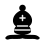

- : Jup.display_id = <abstr>


In [72]:
svg |> Jup.showsvg

In [63]:
svg|> show

- : Jup.display_id = <abstr>


In [66]:
{|
<svg width="100" height="100" viewBox="0 0 45 45" version="1.1"
     xmlns="http://www.w3.org/2000/svg">|}
^ svg ^
{|
</svg>
|} |> show

- : Jup.display_id = <abstr>


In [87]:
{|<svg width="50%" viewBox="0 0 30 10">
  <circle id="myCircle" cx="5" cy="5" r="4"/>
  <use href="#myCircle" x="10" fill="blue"/>
  <use href="#myCircle" x="20" fill="white" stroke="blue"/>
  <use href="#bB" x=50>
</svg>|} |> show

- : Jup.display_id = <abstr>


In [97]:
{|
<svg viewBox="0 0 40 40">
<use href="pieces/bB.svg"/>
</svg>
|} |> show

- : Jup.display_id = <abstr>


In [96]:
{|
<div style="background:#ffe7e8;  width:40%;  border: 2px solid #e66465;">
    <p style="margin: 15px; line-height: 1.5; text-align: center; color:black;">
        Well, I am the slime from your video<br>
        Oozin' along on your livin' room floor.</p>
</div>
|} |> show

Well, I am the slime from your video 
 Oozin' along on your livin' room floor.

- : Jup.display_id = <abstr>
